In [1]:
import subprocess
import time
import os
import sys
import matplotlib.pyplot as plt

In [2]:
def roda_com_entrada(executavel, arquivo_in):
    with open(arquivo_in) as f:
        start = time.perf_counter()
        proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()

        # print('Saída:', proc.stdout)
        # print('Stderr:', proc.stderr)
        print('Tempo total(s):', end - start)
        f.close()
    return (proc.stdout, end - start)

## Algoritmos Sequenciais

Tempo total(s): 0.18892660000710748
Tempo total(s): 0.193254199999501
Tempo total(s): 0.16393740000785328
Tempo total(s): 0.15679069999896456
Tempo total(s): 0.21535720000974834
Tempo total(s): 0.437067399994703
Tempo total(s): 1.1355977000057464
Tempo total(s): 2.5326821000053314
Tempo total(s): 5.417646200003219
Tempo total(s): 11.290144200000213
['5', '10', '15', '20', '30', '40', '50', '60', '70', '80'] [0.18892660000710748, 0.193254199999501, 0.16393740000785328, 0.15679069999896456, 0.21535720000974834, 0.437067399994703, 1.1355977000057464, 2.5326821000053314, 5.417646200003219, 11.290144200000213]


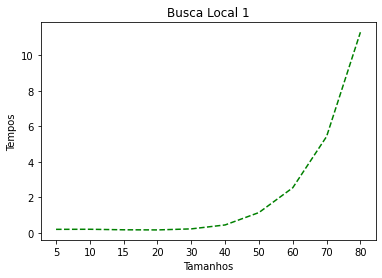

In [3]:
tempos_1 = []
tamanhos_1 = []
for i in range(0, 10):
    with open(f'./entradas-busca-local/in-{i}.txt') as f:
        tamanhos_1.append(f.readline().strip())
    tempos_1.append(roda_com_entrada('./busca-local-1', f'./entradas-busca-local/in-{i}.txt')[1])

print(tamanhos_1, tempos_1)
plt.plot(tamanhos_1, tempos_1, color='green', linestyle='dashed')
plt.title('Busca Local 1')
plt.xlabel('Tamanhos')
plt.ylabel('Tempos')
plt.show()

Tempo total(s): 0.17265490000136197
Tempo total(s): 0.15784279999206774
Tempo total(s): 0.1710976999893319
Tempo total(s): 0.1601348000112921
Tempo total(s): 0.18891720002284274
Tempo total(s): 0.23445180000271648
Tempo total(s): 0.37575619999552146
Tempo total(s): 0.6018672999925911
Tempo total(s): 1.0123576000041794
Tempo total(s): 1.6225560999882873


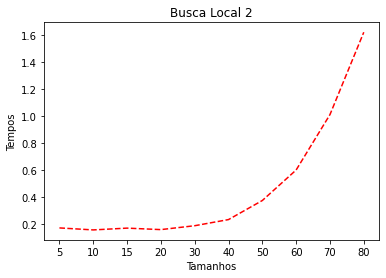

In [18]:
tempos_2 = []
tamanhos_2 = []
for i in range(0, 10):
    with open(f'./entradas-busca-local/in-{i}.txt') as f:
        tamanhos_2.append(f.readline().strip())
    tempos_2.append(roda_com_entrada('./busca-local-2', f'./entradas-busca-local/in-{i}.txt')[1])

plt.plot(tamanhos_2, tempos_2, color='red', linestyle='dashed')
plt.title('Busca Local 2')
plt.xlabel('Tamanhos')
plt.ylabel('Tempos')
plt.show()

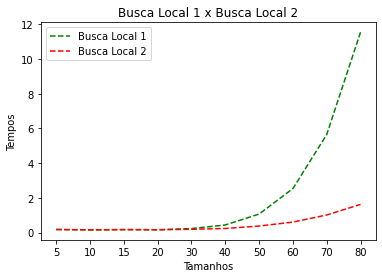

In [19]:
plt.plot(tamanhos_1, tempos_1, color='green', linestyle='dashed', label = 'Busca Local 1')
plt.plot(tamanhos_2, tempos_2, color='red', linestyle='dashed', label = 'Busca Local 2')
plt.title('Busca Local 1 x Busca Local 2')
plt.xlabel('Tamanhos')
plt.ylabel('Tempos')
plt.legend()
plt.show()

Apesar dos outputs serem o mesmo, ou seja, ambos os algoritmos obtem os mesmos resultados, observa-se que o `busca-local-1` possui desempenho inferior em relação ao `busca-local-2` (o tempo difere cada vez que esse jupyter é rodado, mas este fenômeno foi observado repetidas vezes). Para valores de n muito grandes, em contrapartida, parece que o desempenho do primeiro algoritmo se sobressai.

Se existirem dois algoritmos, com complexidades computacionais diferentes, e também sendo que o primeiro é inferior ao segundo, não é possível utilizar paralelismo para tornar o desempenho do primeiro melhor que o segundo. Ou seja, se o algoritmo não é bom, o paralelismo não consegue torná-lo melhor que outro que é melhor para dado problema.